In [1]:
import pandas as pd
import sys
import csv
import numpy as np
csv.field_size_limit(sys.maxsize)

dataset_meli = pd.read_csv('dataset_meli.csv',engine='python')
dataset_meli = dataset_meli.loc[:,~dataset_meli.columns.duplicated()]
dataset_meli.columns.values.tolist()

['category',
 'subcategory',
 'id',
 'site_id',
 'title',
 'price',
 'sale_price',
 'currency_id',
 'available_quantity',
 'sold_quantity',
 'buying_mode',
 'listing_type_id',
 'stop_time',
 'condition',
 'permalink',
 'thumbnail',
 'thumbnail_id',
 'accepts_mercadopago',
 'attributes',
 'original_price',
 'category_id',
 'official_store_id',
 'domain_id',
 'catalog_product_id',
 'tags',
 'catalog_listing',
 'use_thumbnail_id',
 'offer_score',
 'offer_share',
 'match_score',
 'winner_item_id',
 'melicoin',
 'discounts',
 'order_backend',
 'seller.id',
 'seller.permalink',
 'seller.registration_date',
 'seller.car_dealer',
 'seller.real_estate_agency',
 'seller.tags',
 'seller.eshop.seller',
 'seller.eshop.eshop_rubro',
 'seller.eshop.eshop_id',
 'seller.eshop.nick_name',
 'seller.eshop.site_id',
 'seller.eshop.eshop_logo_url',
 'seller.eshop.eshop_status_id',
 'seller.eshop.eshop_experience',
 'seller.eshop.eshop_locations',
 'seller.seller_reputation.power_seller_status',
 'seller.sel

In [2]:
dataset_meli.replace([np.inf, -np.inf], np.nan, inplace=True)


item_keys = ['category', 'subcategory', 'id', 'site_id', 'title', 'price',
             'currency_id', 'available_quantity', 'sold_quantity','original_price','buying_mode',
             'listing_type_id', 'stop_time', 'condition', 'permalink', 'thumbnail', 
             'thumbnail_id', 'accepts_mercadopago', 
             'category_id', 'official_store_id', 'domain_id', 'catalog_product_id',
             'order_backend', 'use_thumbnail_id']

dataset = dataset_meli[item_keys]
dataset.to_csv('dataset.csv', index=False)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33420 entries, 0 to 33419
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category             33420 non-null  object 
 1   subcategory          33420 non-null  object 
 2   id                   33420 non-null  object 
 3   site_id              33420 non-null  object 
 4   title                33420 non-null  object 
 5   price                33420 non-null  float64
 6   currency_id          33420 non-null  object 
 7   available_quantity   33420 non-null  int64  
 8   sold_quantity        33420 non-null  int64  
 9   original_price       5898 non-null   float64
 10  buying_mode          33420 non-null  object 
 11  listing_type_id      33420 non-null  object 
 12  stop_time            33420 non-null  object 
 13  condition            32370 non-null  object 
 14  permalink            33420 non-null  object 
 15  thumbnail            33420 non-null 

In [4]:
dataset['official_store_id'] = dataset['official_store_id'].replace(np.nan,0)
dataset['condition'] = dataset['condition'].replace(['new'],1)
dataset['condition'] = dataset['condition'].replace(['used'],0)
dataset['catalog_product_id'] = dataset['catalog_product_id'].replace(np.nan,0)
dataset['original_price'] = dataset['original_price'].replace(np.nan,0)

/home/dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/dev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [5]:
#selecciono features
dataset = dataset[['price', 'available_quantity','sold_quantity','original_price', 'official_store_id','order_backend','condition']]

# Crea un dataframe de variables numericas y otro de categoricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
products_numeric = dataset.select_dtypes(include=numerics)

categorical = ['object']
products_categorical = dataset.select_dtypes(include=categorical)

# Cambia las variables 
binary = ['bool']
products_binary = dataset.select_dtypes(include=binary)

# Revisa que todas las variables de products_selected esten en products_numeric, products_binary y products_categorical
assert(dataset.shape[1] == (products_categorical.shape[1]+products_numeric.shape[1]+products_binary.shape[1]))

# Imprime las dimensiones de cada base
print('LAS DIMENSIONES DE LA DATA NUMERICA DE PRODUCTOS SON: {}'.format(products_numeric.shape))
print('LAS DIMENSIONES DE LA DATA CATEGORICA DE PRODUCTOS SON: {}'.format(products_categorical.shape))
print('LAS DIMENSIONES DE LA DATA BINARIA DE PRODUCTOS SON: {}'.format(products_binary.shape))


LAS DIMENSIONES DE LA DATA NUMERICA DE PRODUCTOS SON: (33420, 6)
LAS DIMENSIONES DE LA DATA CATEGORICA DE PRODUCTOS SON: (33420, 1)
LAS DIMENSIONES DE LA DATA BINARIA DE PRODUCTOS SON: (33420, 0)


## Detalles estaditicos

In [7]:
dataset.describe()


,price,available_quantity,sold_quantity,original_price,official_store_id,order_backend
count,3.342000e+04,33420.000000,33420.000000,33420.000000,33420.000000,33420.000000
mean,1.575391e+05,607.876571,725.083692,2745.908062,257.762118,25.516338
std,9.077160e+05,4565.830663,2843.547928,15228.904456,657.435411,14.430774
min,4.505000e+01,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.751000e+03,1.000000,26.000000,0.000000,0.000000,13.000000
50%,4.999000e+03,15.000000,184.000000,0.000000,0.000000,26.000000
75%,1.465899e+04,115.500000,500.000000,0.000000,0.000000,38.000000
max,1.180000e+07,99912.000000,50000.000000,353849.000000,2817.000000,50.000000


In [13]:
dataset.isnull().any()
#dataset['condition'] = dataset.condition.replace(np.nan,0)
dataset['condition']

0            0.0
1        14390.0
2            0.0
3            0.0
4            0.0
          ...   
33415        0.0
33416        0.0
33417        0.0
33418     5999.0
33419        0.0
Name: original_price, Length: 33420, dtype: float64

## Encoding categorical variables

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

# Cambia las variables binarias True-False por 1-0 
products_binary = products_binary.astype(int)

frames = [products_numeric,products_binary,products_categorical]
dataset= pd.concat(frames,axis=1)



Index(['price', 'available_quantity', 'sold_quantity', 'original_price',
       'official_store_id', 'order_backend', 'condition'],
      dtype='object')

In [17]:
x = dataset[['price', 'available_quantity','original_price', 'official_store_id','order_backend', 'original_price']]
y = dataset [['sold_quantity']]


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [19]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
coeff_df = pd.DataFrame(regressor.coef_[0], x.columns, columns=['Coeffecient'])

coeff_df



,Coeffecient
price,-0.000164
available_quantity,0.007497
original_price,-0.002283
official_store_id,0.240160
order_backend,-3.364038
original_price,-0.002283


## Linear Regression

In [21]:
y_pred = regressor.predict(x_test)

y_test = y_test['sold_quantity'].to_list()
y_pred = y_pred.tolist()


In [22]:
df = pd.DataFrame({'Sold_q actual ': y_test, 'Predicted': y_pred})
df


,Sold_q actual,Predicted
0,150,[699.4315921773082]
1,35,[594.2722935915601]
2,500,[732.4424054876815]
3,0,[196.1103205267375]
4,1070,[689.400711518419]
...,...,...
6679,5000,[659.0482878759593]
6680,487,[645.294424691824]
6681,0,[638.2414054880309]
6682,0,[705.6283296498927]


# Gradient Boosting

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math


In [24]:
target = dataset['sold_quantity']
predictors = x
x_train, x_cv, y_train, y_cv = train_test_split(predictors, target, test_size=0.2, random_state=1)

In [25]:
rmse_models = []
params = [{'max_depth': [3,10,20], 'learning_rate': [0.0001, 0.01, 0.1, 0.5], 'n_estimators': [100, 150, 200, 250]}]

gb = GridSearchCV(GradientBoostingRegressor(), params, cv=3)
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_cv)
gb_r2 = r2_score(y_cv, y_pred_gb)
gb_mse = mean_squared_error(y_cv, y_pred_gb)
gb_rmse = math.sqrt(gb_mse)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_cv, y_pred_gb))
print('Mean Squared Error:', metrics.mean_squared_error(y_cv, y_pred_gb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_cv, y_pred_gb)))

df = pd.DataFrame({'Sold quantity ': y_cv, 'Predicted': y_pred_gb})
df

Mean Absolute Error: 57.02502887500867
Mean Squared Error: 41819.20503890388
Root Mean Squared Error: 204.49744506693446


,Sold quantity,Predicted
22194,0,2.680378
8743,196,208.600475
3415,540,448.709979
29276,299,280.844740
17673,1080,1130.915549
...,...,...
2450,5000,4780.745593
5472,500,511.364788
22413,0,2.948206
10586,18,37.088016


In [33]:
importances = list(gb.best_estimator_.feature_importances_)



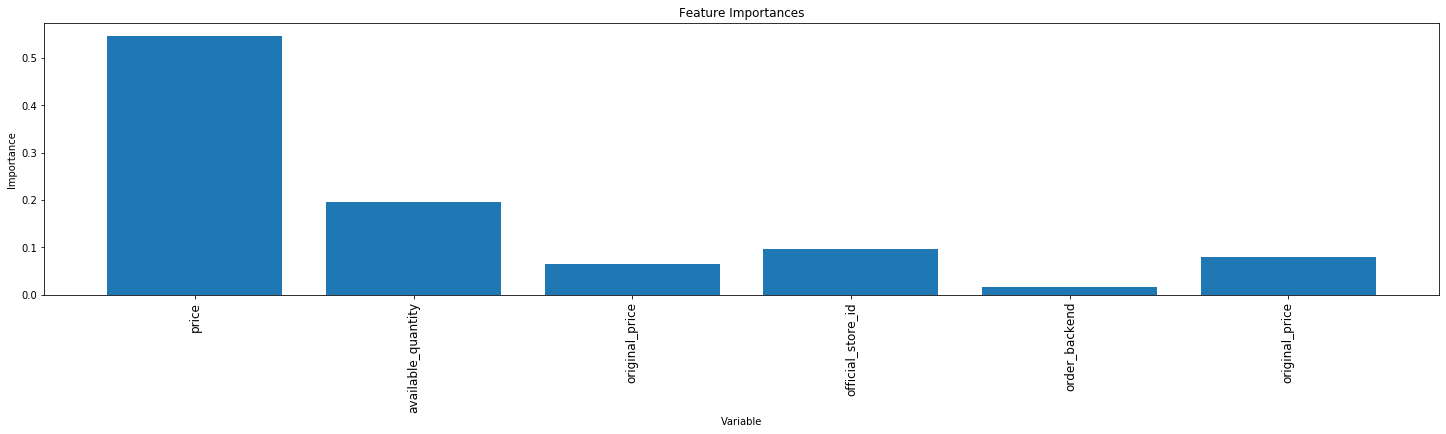

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 5))
ax = fig.add_subplot(111)
x_values = list(range(len(importances)))
ax.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, x, rotation='vertical', fontsize=12)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Feature Importances');
